# Learn make moons

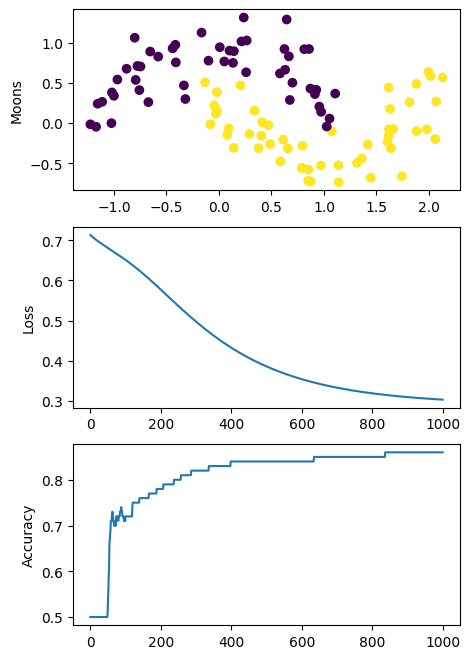

In [1]:
from sklearn.datasets import make_moons
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import SGD
import matplotlib.pyplot as plt

n_sample = 100
X, y = make_moons(n_samples=n_sample, noise=0.2)

dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))
BATCH_SIZE = 8
data_loader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE)

class MakeMoonModel(nn.Module):
  def __init__(self):
    super(MakeMoonModel, self).__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=2)
    self.act_1 = nn.Sigmoid()
    self.layer_2 = nn.Linear(in_features=2, out_features=1)
    self.act_2 = nn.Sigmoid()

  def forward(self, x):
    l1 = self.layer_1(x)
    a1 = self.act_1(l1)
    l2 = self.layer_2(a1)
    a2 = self.act_2(l2)
    return a2.view(-1)

LR = 0.01
DEVICE = "cpu"
model = MakeMoonModel()
model = model.to(DEVICE)
loss_function = nn.BCELoss(reduction="mean")
optimizer = SGD(model.parameters(), lr=LR)

epoch_time = 1000
epoch_losses, accs = [], []
stop_criterion = 0.3

for epoch in range(epoch_time):

  epoch_loss = 0.
  epoch_correct_counts = 0
  for X_, y_ in data_loader:
    X_, y_ = X_.to(DEVICE), y_.to(DEVICE)

    pred = model(X_)
    loss = loss_function(pred, torch.FloatTensor(y_).to(DEVICE))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    correct_counts = ((pred > 0.5).type(torch.float) == y_).sum().item()
    epoch_correct_counts += correct_counts
    epoch_loss += loss.item() * len(X_)

  epoch_losses.append(epoch_loss / n_sample)
  accs.append(epoch_correct_counts / n_sample)
  if epoch_loss / n_sample < stop_criterion:
    break

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 8))
axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[0].set_ylabel("Moons")
axes[1].plot(range(len(epoch_losses)), epoch_losses)
axes[1].set_ylabel("Loss")
axes[2].plot(range(len(accs)), accs)
axes[2].set_ylabel("Accuracy")
plt.show()


### By functions

Epoch: 30, Loss: 0.5638 - Acc: 0.7433

Epoch: 60, Loss: 0.3688 - Acc: 0.8333

Epoch: 90, Loss: 0.2984 - Acc: 0.8633

Epoch: 120, Loss: 0.2723 - Acc: 0.8800

Epoch: 150, Loss: 0.2625 - Acc: 0.8867

Epoch: 180, Loss: 0.2585 - Acc: 0.8900

Epoch: 210, Loss: 0.2567 - Acc: 0.8933

Epoch: 240, Loss: 0.2557 - Acc: 0.8933

Epoch: 270, Loss: 0.2550 - Acc: 0.8933

Epoch: 300, Loss: 0.2546 - Acc: 0.8933



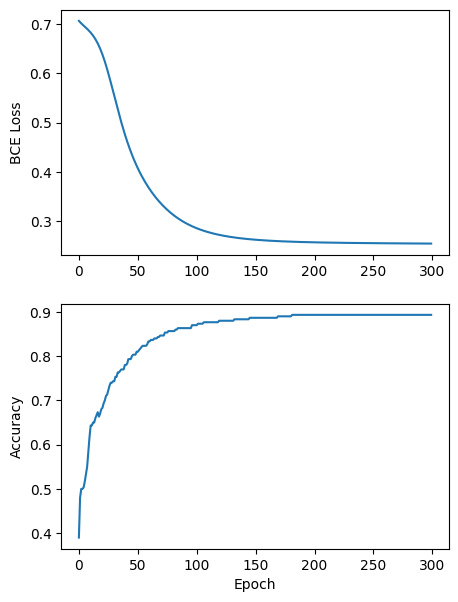

In [5]:
import sys
source_path = "~"
sys.path.append(source_path)

from utils import get_dataset, get_device, train, vis_losses_accs
from model import MLP
import torch.nn as nn
from torch.optim import SGD

N_SAMPLES = 300
BATCH_SIZE = 8
EPOCHS = 300
LR = 0.03
DEVICE = get_device()

dataloader = get_dataset(N_SAMPLES, BATCH_SIZE)

model = MLP().to(DEVICE)
loss_function = nn.BCELoss()
optimizer = SGD(model.parameters(), lr=LR)

losses, accs = [], []
for epoch in range(EPOCHS):
  epoch_loss, epoch_acc = train(dataloader, N_SAMPLES, model, loss_function, optimizer, DEVICE)

  losses.append(epoch_loss)
  accs.append(epoch_acc)

  if (epoch+1) % 30 == 0:
    print(f"Epoch: {epoch + 1}, Loss: {epoch_loss:.4f} - Acc: {epoch_acc:.4f}\n")

vis_losses_accs(losses, accs)

### XOR ANN

10) epoch_loss 0.6946946740150451, epoch_acc 0.5
20) epoch_loss 0.6941654054323833, epoch_acc 0.4866666666666667
30) epoch_loss 0.6933036224047343, epoch_acc 0.48
40) epoch_loss 0.6915695802370707, epoch_acc 0.5133333333333333
50) epoch_loss 0.687606778939565, epoch_acc 0.5966666666666667
60) epoch_loss 0.6777554933230082, epoch_acc 0.7033333333333334
70) epoch_loss 0.6537473813692729, epoch_acc 0.7466666666666667
80) epoch_loss 0.6043906664848328, epoch_acc 0.75
90) epoch_loss 0.5207082772254944, epoch_acc 0.9133333333333333
100) epoch_loss 0.3994169855117798, epoch_acc 1.0


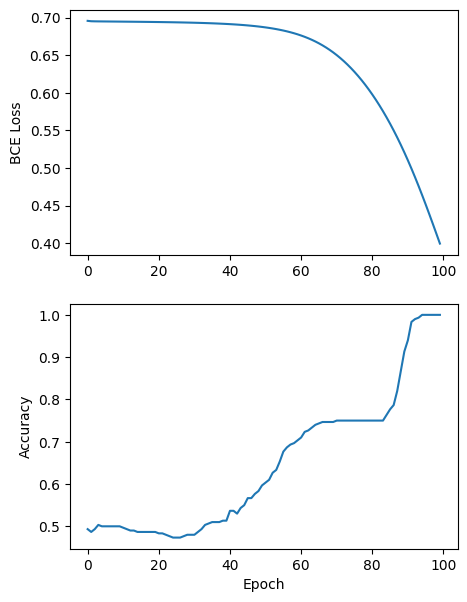

In [7]:
import sys
source_path = "~"
sys.path.append(source_path)

from xor_utils import get_dataset, get_device, train, vis_losses_accs, vis_classifications
from xor_model import MLP
import torch
import torch.nn as nn
from torch.optim import SGD

N_SAMPLES = 300
BATCH_SIZE = 16
EPOCHS = 100
LR = 0.1
DEVICE = get_device()

dataloader, X = get_dataset(N_SAMPLES, BATCH_SIZE)

model = MLP(
  [
    (2, 4),
    (4, 1)
  ]
).to(DEVICE)
loss_function = nn.BCELoss()
optimizer = SGD(model.parameters(), lr=LR)

losses, accs = [], []
for epoch in range(EPOCHS):
  epoch_loss, epoch_acc = train(dataloader, N_SAMPLES, model, loss_function, optimizer, DEVICE)
  if (epoch+1) % 10 == 0:
    print(f"{epoch+1}) epoch_loss {epoch_loss}, epoch_acc {epoch_acc}")
  losses.append(epoch_loss)
  accs.append(epoch_acc)

vis_losses_accs(losses, accs)

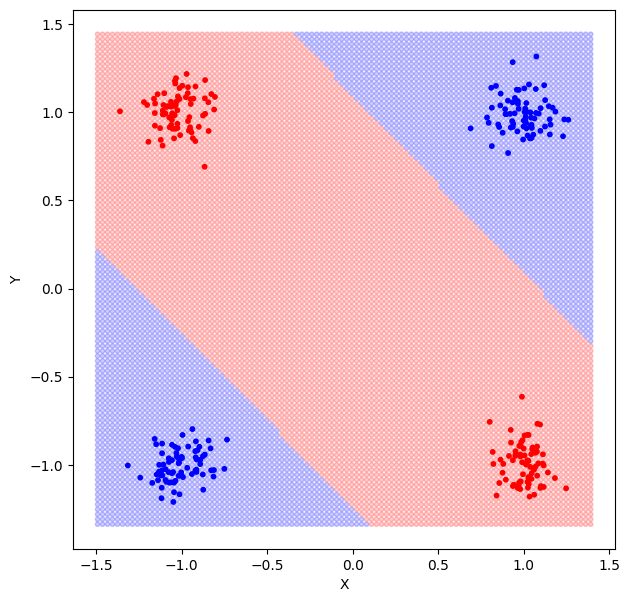

In [8]:
X = torch.FloatTensor(X).to(DEVICE)
preds = model(X)
vis_classifications(model, X, preds, DEVICE)